In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [2]:
batch_size = 100#batch_size will be used to get accuracy
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
data_dir = '/input/data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','test','validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train','test','validation']}

In [3]:
class ConvNet_L6_A(nn.Module):
    def __init__(self):
        super(ConvNet_L6_A, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)


    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [4]:
class ConvNet_L6_B(nn.Module):
    def __init__(self):
        super(ConvNet_L6_B, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)
        
    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [5]:
class ConvNet_L6_C(nn.Module):
    def __init__(self):
        super(ConvNet_L6_C, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 64, 3, 1, 1) 
        self.conv2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 1)       
        self.conv4 = nn.Conv2d(256, 512, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*512, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)
        
    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [6]:
class ConvNet_L6_D(nn.Module):
    def __init__(self):
        super(ConvNet_L6_D, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv6 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv5(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv6(x)), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [7]:
class ConvNet_L6_E(nn.Module):
    def __init__(self):
        super(ConvNet_L6_E, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv5 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv6 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(F.relu(self.conv6(x)), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [3]:
class ConvNet_L6_F(nn.Module):
    def __init__(self):
        super(ConvNet_L6_F, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv1_bn = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
        x = F.relu(self.conv5_bn(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
        x = F.relu(self.conv7_bn(self.conv7(x)))
        x = F.max_pool2d(F.relu(self.conv8_bn(self.conv8(x))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [4]:
class ConvNet_L6_G(nn.Module):
    def __init__(self):
        super(ConvNet_L6_G, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv1_bn = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_bn = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_bn = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_bn = nn.BatchNorm2d(64)

        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_bn = nn.BatchNorm2d(128)

        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_bn = nn.BatchNorm2d(128)

        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_bn = nn.BatchNorm2d(256)

        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_bn = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
        x = F.relu(self.conv5_bn(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
        x = F.relu(self.conv7_bn(self.conv7(x)))
        x = F.max_pool2d(F.relu(self.conv8_bn(self.conv8(x))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [5]:
class ConvNet_L6_H(nn.Module):
    def __init__(self):
        super(ConvNet_L6_H, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_bn = nn.BatchNorm2d(32)
            
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv9_bn = nn.BatchNorm2d(256)
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv10_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
        x = F.relu(self.conv5_bn(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
        x = F.relu(self.conv7_bn(self.conv7(x)))
        x = F.relu(self.conv8_bn(self.conv8(x)))
        x = F.relu(self.conv9_bn(self.conv9(x)))
        x = F.max_pool2d(F.relu(self.conv10_bn(self.conv10(x))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [6]:
class ConvNet_L6_I(nn.Module):
    def __init__(self):
        super(ConvNet_L6_I, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(4*4*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(F.relu(self.conv6(x)), 2, 2)
        x = F.relu(self.conv7(x))
        x = F.max_pool2d(F.relu(self.conv8(x)), 2, 2)
        x = F.relu(self.conv9(x))
        x = F.max_pool2d(F.relu(self.conv10(x)), 2, 2)
        x = x.view(-1, 4*4*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [7]:
class ConvNet_L6_I_Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L6_I_Plus, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_bn = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv9_bn = nn.BatchNorm2d(256)
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv10_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(4*4*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
        x = F.relu(self.conv5_bn(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
        x = F.relu(self.conv7_bn(self.conv7(x)))
        x = F.max_pool2d(F.relu(self.conv8_bn(self.conv8(x))), 2, 2)
        x = F.relu(self.conv9_bn(self.conv9(x)))
        x = F.max_pool2d(F.relu(self.conv10_bn(self.conv10(x))), 2, 2)
        x = x.view(-1, 4*4*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [8]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred, dim = 1), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    accuracy = float(count)/float(batch_size*len(dataset))
    model.test_accuracy.append(accuracy)
    print('accuracy on test set: {:.3f}%'.format(100*accuracy),count)

In [9]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 30):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.train_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))
            AccuracyHelper(self.model,self.data['test'])

In [10]:
# model_l6_a = ConvNet_L6_A()
# model_l6_a.cuda()
# model_l6_b = ConvNet_L6_B()
# model_l6_b.cuda()
# model_l6_c = ConvNet_L6_C()
# model_l6_c.cuda()
# model_l6_d = ConvNet_L6_D()
# model_l6_d.cuda()
# model_l6_e = ConvNet_L6_E()
# model_l6_e.cuda()
# model_l6_f = ConvNet_L6_F()
# model_l6_f.cuda()
# model_l6_g = ConvNet_L6_G()
# model_l6_g.cuda()
model_l6_h = ConvNet_L6_H()
model_l6_h.cuda()
model_l6_i = ConvNet_L6_I()
model_l6_i.cuda()
model_l6_i_p = ConvNet_L6_I_Plus()
model_l6_i_p.cuda()

ConvNet_L6_I_Plus(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (conv7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7_bn): BatchNorm2d(25

In [30]:
start_time = time.time()
train = Training(dataloaders, model_l6_a,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.606381	Accuracy: 0.020
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.602268	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.601369	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.604131	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.603050	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.604121	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.606969	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.604481	Accuracy: 0.020
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.602596	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.604512	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.601613	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.604286	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605146	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.606020	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 2.075426	Accuracy: 0.510
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 2.183419	Accuracy: 0.410
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 2.486885	Accuracy: 0.410
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 2.110483	Accuracy: 0.450
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 2.165487	Accuracy: 0.400
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 2.103625	Accuracy: 0.510
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 2.419695	Accuracy: 0.360
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 2.377178	Accuracy: 0.390
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.833932	Accuracy: 0.540
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 2.090000	Accuracy: 0.480
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.664086	Accuracy: 0.600
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 2.067127	Accuracy: 0.480
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 2.003468	Accuracy: 0.440
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.942959	Accuracy: 0.480
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.451897	Accuracy: 0.890
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.449781	Accuracy: 0.870
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.442895	Accuracy: 0.880
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.383871	Accuracy: 0.910
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.527271	Accuracy: 0.850
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.378533	Accuracy: 0.900
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.502905	Accuracy: 0.830
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.491229	Accuracy: 0.860
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.453881	Accuracy: 0.870
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.487643	Accuracy: 0.860
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.314238	Accuracy: 0.890
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.414308	Accuracy: 0.870
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.491314	Accuracy: 0.820
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.399494	Accuracy: 0.840
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.127148	Accuracy: 0.970
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.033048	Accuracy: 0.990
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.110953	Accuracy: 0.960
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.155568	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.131329	Accuracy: 0.960
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.157710	Accuracy: 0.950
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.167671	Accuracy: 0.960
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.047794	Accuracy: 0.990
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.027935	Accuracy: 1.000
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.100705	Accuracy: 0.960
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.099827	Accuracy: 0.970
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.234185	Accuracy: 0.920
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.142954	Accuracy: 0.960
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.140425	Accuracy: 0.970
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.034064	Accuracy: 0.980
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.069189	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.030996	Accuracy: 0.990
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.076958	Accuracy: 0.980
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.024789	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.028667	Accuracy: 0.990
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.062369	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.068275	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.108765	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.032601	Accuracy: 0.990
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.103023	Accuracy: 0.970
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.019308	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.043931	Accuracy: 0.980
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.060992	Accuracy: 0.980
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.001489	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.036852	Accuracy: 0.980
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.015462	Accuracy: 0.990
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.000895	Accuracy: 1.000
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.015422	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.054300	Accuracy: 0.990
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.070222	Accuracy: 0.980
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.074450	Accuracy: 0.980
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.055867	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.004125	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.011524	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.029688	Accuracy: 0.990
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.006430	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.036972	Accuracy: 0.980
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.026446	Accuracy: 0.990
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.007896	Accuracy: 1.000
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.002089	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.001624	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.025789	Accuracy: 0.990
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.005100	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.024352	Accuracy: 0.990
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.000707	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.001647	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.023245	Accuracy: 0.980
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.001703	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.007159	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.047209	Accuracy: 0.990
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.003180	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.057855	Accuracy: 0.980
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.001768	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.005811	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.003852	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.001046	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.008502	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.019274	Accuracy: 0.990
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.000217	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.002261	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.004645	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.005096	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.016697	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.003765	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.008755	Accuracy: 0.990
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.010804	Accuracy: 0.990
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.003593	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000528	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.000993	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000528	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000590	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.001923	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.009936	Accuracy: 0.990
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.068539	Accuracy: 0.990
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.000684	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000424	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000642	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.018951	Accuracy: 0.990
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.005643	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000090	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000053	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000116	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000126	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000101	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000125	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000107	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000075	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000129	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000023	Accuracy: 1.000
Train 

In [31]:
start_time = time.time()
train = Training(dataloaders, model_l6_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.604250	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.606985	Accuracy: 0.000
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.605484	Accuracy: 0.020
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.600669	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.607344	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.605845	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.607678	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.607168	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.605292	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.606582	Accuracy: 0.000
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.607965	Accuracy: 0.000
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.604317	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605803	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.607566	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 4.489521	Accuracy: 0.020
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 4.348698	Accuracy: 0.020
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 4.323820	Accuracy: 0.030
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 4.322534	Accuracy: 0.050
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 4.470196	Accuracy: 0.040
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 4.320036	Accuracy: 0.020
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 4.307954	Accuracy: 0.030
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 4.298192	Accuracy: 0.030
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 4.324099	Accuracy: 0.040
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 3.994812	Accuracy: 0.050
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 3.962970	Accuracy: 0.070
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 4.290561	Accuracy: 0.030
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 4.097399	Accuracy: 0.050
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 4.183722	Accuracy: 0.060
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.929145	Accuracy: 0.770
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 1.149604	Accuracy: 0.720
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 1.180077	Accuracy: 0.690
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.791395	Accuracy: 0.770
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 1.169533	Accuracy: 0.690
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 1.134672	Accuracy: 0.730
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.915178	Accuracy: 0.770
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 1.000845	Accuracy: 0.700
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.681911	Accuracy: 0.820
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 1.066297	Accuracy: 0.720
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.859780	Accuracy: 0.770
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 1.179152	Accuracy: 0.680
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.845844	Accuracy: 0.760
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 1.266066	Accuracy: 0.660
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.310132	Accuracy: 0.910
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.250329	Accuracy: 0.910
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.193141	Accuracy: 0.950
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.156348	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.214194	Accuracy: 0.940
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.118139	Accuracy: 0.960
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.252316	Accuracy: 0.930
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.125648	Accuracy: 0.930
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.294212	Accuracy: 0.920
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.184053	Accuracy: 0.940
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.144093	Accuracy: 0.950
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.326014	Accuracy: 0.920
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.364400	Accuracy: 0.890
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.222858	Accuracy: 0.940
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.029849	Accuracy: 1.000
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.028340	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.129943	Accuracy: 0.970
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.014625	Accuracy: 1.000
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.054407	Accuracy: 0.980
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.129191	Accuracy: 0.980
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.114588	Accuracy: 0.950
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.097573	Accuracy: 0.970
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.028380	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.020321	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.055809	Accuracy: 0.990
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.118599	Accuracy: 0.970
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.066825	Accuracy: 0.970
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.054050	Accuracy: 0.980
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.006414	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.028445	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.013886	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.048250	Accuracy: 0.970
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.022406	Accuracy: 0.990
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.003422	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.026970	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.089852	Accuracy: 0.960
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.091804	Accuracy: 0.980
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.007490	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.011555	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.041768	Accuracy: 0.990
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.210211	Accuracy: 0.940
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.076715	Accuracy: 0.970
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.001641	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.012275	Accuracy: 1.000
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.016299	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.004009	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.010395	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.002376	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.011437	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.016399	Accuracy: 0.990
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.008923	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.001179	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.000386	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.005285	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.023818	Accuracy: 0.990
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.005074	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.020055	Accuracy: 0.990
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.014662	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.009818	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.001214	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.004672	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.002773	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.001952	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.000841	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.003843	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.001965	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.019177	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.038704	Accuracy: 0.990
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.033405	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.002512	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.001592	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.001023	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000907	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.002733	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.001973	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000541	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.001951	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.001159	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.007987	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.048806	Accuracy: 0.990
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.003777	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000363	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.001858	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.004224	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000065	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.027185	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000073	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000313	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000528	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000185	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000523	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000308	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000124	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000037	Accuracy: 1.000
Train 

In [32]:
start_time = time.time()
train = Training(dataloaders, model_l6_c,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.606399	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604750	Accuracy: 0.030
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.602690	Accuracy: 0.030
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.603179	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.602406	Accuracy: 0.030
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.608012	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.607501	Accuracy: 0.040
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.606042	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.606311	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.604412	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.604386	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.606813	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605307	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.609767	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 4.282337	Accuracy: 0.080
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 4.180820	Accuracy: 0.040
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 4.240503	Accuracy: 0.060
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 4.288990	Accuracy: 0.050
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 4.091651	Accuracy: 0.040
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 4.097225	Accuracy: 0.070
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 4.080551	Accuracy: 0.080
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 4.114174	Accuracy: 0.060
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 4.155930	Accuracy: 0.040
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 4.232426	Accuracy: 0.030
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 3.853111	Accuracy: 0.090
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 4.073460	Accuracy: 0.050
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 3.816188	Accuracy: 0.120
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 3.818169	Accuracy: 0.060
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.907573	Accuracy: 0.780
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.599755	Accuracy: 0.810
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 1.132806	Accuracy: 0.690
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.733497	Accuracy: 0.810
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.568955	Accuracy: 0.840
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.870268	Accuracy: 0.750
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.856884	Accuracy: 0.810
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.742147	Accuracy: 0.790
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.911444	Accuracy: 0.780
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.781325	Accuracy: 0.810
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.817867	Accuracy: 0.750
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.949803	Accuracy: 0.760
Train Epoch: 6 [20000/38000 (52.632%)]	Loss: 1.111172	Accuracy: 0.760
Train Epoch: 6 [21000/38000 (55.263%)]	Loss: 0.690927	Accuracy: 0.810
Train Epoch: 6 [22000/

Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.140675	Accuracy: 0.970
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.203367	Accuracy: 0.950
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.196888	Accuracy: 0.940
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.147238	Accuracy: 0.930
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.242443	Accuracy: 0.910
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.072238	Accuracy: 0.990
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.214075	Accuracy: 0.950
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.207991	Accuracy: 0.960
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.158136	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.164827	Accuracy: 0.960
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.125129	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.121568	Accuracy: 0.970
Train Epoch: 9 [23000/38000 (60.526%)]	Loss: 0.323893	Accuracy: 0.900
Train Epoch: 9 [24000/38000 (63.158%)]	Loss: 0.149391	Accuracy: 0.960
Train Epoch: 9 [2500

Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.081302	Accuracy: 0.960
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.056052	Accuracy: 0.970
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.047277	Accuracy: 0.980
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.018478	Accuracy: 0.990
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.055418	Accuracy: 0.980
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.031697	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.015351	Accuracy: 1.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.056477	Accuracy: 0.990
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.064194	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.091924	Accuracy: 0.970
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.052418	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.097141	Accuracy: 0.980
Train Epoch: 12 [25000/38000 (65.789%)]	Loss: 0.053237	Accuracy: 0.980
Train Epoch: 12 [26000/38000 (68.421%)]	Loss: 0.031952	Accuracy: 1.000
Train 

Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.013608	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.025563	Accuracy: 0.990
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.013400	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.049688	Accuracy: 0.990
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.000233	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.252271	Accuracy: 0.970
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.136574	Accuracy: 0.980
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.060329	Accuracy: 0.970
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.038993	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.091100	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.018342	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.028285	Accuracy: 0.990
Train Epoch: 15 [26000/38000 (68.421%)]	Loss: 0.005422	Accuracy: 1.000
Train Epoch: 15 [27000/38000 (71.053%)]	Loss: 0.126455	Accuracy: 0.980
Train 

Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.006038	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.010169	Accuracy: 0.990
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.005806	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.031692	Accuracy: 0.990
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.007130	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.003039	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.003149	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.020133	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.003910	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.020671	Accuracy: 0.990
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.043796	Accuracy: 0.990
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.014979	Accuracy: 1.000
Train Epoch: 18 [27000/38000 (71.053%)]	Loss: 0.002230	Accuracy: 1.000
Train Epoch: 18 [28000/38000 (73.684%)]	Loss: 0.009161	Accuracy: 1.000
Train 

Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.034094	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.004371	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.004440	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.040939	Accuracy: 0.980
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.009813	Accuracy: 0.990
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.000733	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.003619	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.005567	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.119354	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.015124	Accuracy: 0.990
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.007892	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.001464	Accuracy: 1.000
Train Epoch: 21 [28000/38000 (73.684%)]	Loss: 0.004766	Accuracy: 1.000
Train Epoch: 21 [29000/38000 (76.316%)]	Loss: 0.006738	Accuracy: 1.000
Train 

Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.003590	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.000125	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000294	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000827	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.000523	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.000532	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.001880	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.000377	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.017818	Accuracy: 0.990
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.001091	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.002214	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.022062	Accuracy: 0.990
Train Epoch: 24 [29000/38000 (76.316%)]	Loss: 0.000339	Accuracy: 1.000
Train Epoch: 24 [30000/38000 (78.947%)]	Loss: 0.002501	Accuracy: 1.000
Train 

Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000337	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000336	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000690	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000713	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000892	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.004722	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.002606	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.002666	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.001507	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.003547	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.001661	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000409	Accuracy: 1.000
Train Epoch: 27 [30000/38000 (78.947%)]	Loss: 0.003535	Accuracy: 1.000
Train Epoch: 27 [31000/38000 (81.579%)]	Loss: 0.001190	Accuracy: 1.000
Train 

In [33]:
start_time = time.time()
train = Training(dataloaders, model_l6_d,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.607495	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.602108	Accuracy: 0.030
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.601737	Accuracy: 0.020
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.604688	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.603529	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.606441	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.601727	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.607667	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.607336	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.604116	Accuracy: 0.030
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.602437	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.601340	Accuracy: 0.020
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605651	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.607231	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 4.605792	Accuracy: 0.010
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 4.605550	Accuracy: 0.000
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 4.606425	Accuracy: 0.010
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 4.607094	Accuracy: 0.010
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 4.605725	Accuracy: 0.010
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 4.607506	Accuracy: 0.010
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 4.605533	Accuracy: 0.000
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 4.605270	Accuracy: 0.000
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 4.606005	Accuracy: 0.010
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 4.606030	Accuracy: 0.010
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 4.605361	Accuracy: 0.000
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 4.605170	Accuracy: 0.020
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 4.605567	Accuracy: 0.000
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 4.606495	Accuracy: 0.000
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 4.605740	Accuracy: 0.010
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 4.606630	Accuracy: 0.010
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 4.606617	Accuracy: 0.000
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 4.606090	Accuracy: 0.000
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 4.603959	Accuracy: 0.040
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 4.606900	Accuracy: 0.000
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 4.605163	Accuracy: 0.010
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 4.604279	Accuracy: 0.010
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 4.607219	Accuracy: 0.000
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 4.605661	Accuracy: 0.000
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 4.604550	Accuracy: 0.010
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 4.606540	Accuracy: 0.000
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 4.608262	Accuracy: 0.000
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 4.604856	Accuracy: 0.000
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 4.605334	Accuracy: 0.010
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 4.605294	Accuracy: 0.020
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 4.605668	Accuracy: 0.010
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 4.603157	Accuracy: 0.030
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 4.606406	Accuracy: 0.000
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 4.606564	Accuracy: 0.010
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 4.605967	Accuracy: 0.020
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 4.604171	Accuracy: 0.010
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 4.603876	Accuracy: 0.020
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 4.605974	Accuracy: 0.000
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 4.605852	Accuracy: 0.010
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 4.604372	Accuracy: 0.010
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 4.607187	Accuracy: 0.000
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 4.606214	Accuracy: 0.000
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 4.598348	Accuracy: 0.010
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 4.584858	Accuracy: 0.010
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 4.565419	Accuracy: 0.010
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 4.547942	Accuracy: 0.000
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 4.603918	Accuracy: 0.010
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 4.573076	Accuracy: 0.050
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 4.567896	Accuracy: 0.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 4.583369	Accuracy: 0.030
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 4.465021	Accuracy: 0.020
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 4.461180	Accuracy: 0.050
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 4.510018	Accuracy: 0.030
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 4.491323	Accuracy: 0.030
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 4.477064	Accuracy: 0.020
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 4.338374	Accuracy: 0.040
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.848815	Accuracy: 0.770
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.591421	Accuracy: 0.810
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.811067	Accuracy: 0.760
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 1.026652	Accuracy: 0.730
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 1.020081	Accuracy: 0.730
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 1.049769	Accuracy: 0.740
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.890987	Accuracy: 0.770
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.719003	Accuracy: 0.810
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.941308	Accuracy: 0.800
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.995091	Accuracy: 0.750
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.991711	Accuracy: 0.750
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.966223	Accuracy: 0.770
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.736272	Accuracy: 0.780
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 1.090384	Accuracy: 0.750
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.188502	Accuracy: 0.940
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.058747	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.208511	Accuracy: 0.930
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.109413	Accuracy: 0.970
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.328365	Accuracy: 0.900
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.164058	Accuracy: 0.950
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.111102	Accuracy: 0.970
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.107389	Accuracy: 0.960
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.185857	Accuracy: 0.950
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.145950	Accuracy: 0.970
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.365576	Accuracy: 0.890
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.539589	Accuracy: 0.830
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.230771	Accuracy: 0.920
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.336423	Accuracy: 0.920
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.037035	Accuracy: 0.980
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.011473	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.007353	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.013448	Accuracy: 0.990
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.009187	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.037966	Accuracy: 0.990
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.006549	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.092008	Accuracy: 0.980
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.070427	Accuracy: 0.970
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.049557	Accuracy: 0.980
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.090888	Accuracy: 0.970
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.198748	Accuracy: 0.920
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.064038	Accuracy: 0.960
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.007742	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.048738	Accuracy: 0.990
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.025872	Accuracy: 0.990
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.095018	Accuracy: 0.980
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.002312	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.024382	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.035201	Accuracy: 0.990
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.019714	Accuracy: 0.990
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.031235	Accuracy: 0.990
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.012932	Accuracy: 0.990
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.014355	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.013314	Accuracy: 0.990
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.031364	Accuracy: 0.990
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.007683	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.051509	Accuracy: 0.980
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.004225	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.006242	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.053305	Accuracy: 0.980
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.075540	Accuracy: 0.990
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.006142	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.007116	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.109972	Accuracy: 0.990
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.003632	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000408	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000160	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.003355	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.007474	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.003734	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.002798	Accuracy: 1.000
Train 

In [34]:
start_time = time.time()
train = Training(dataloaders, model_l6_e,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.603411	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.606114	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.605155	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.607944	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.602806	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.605109	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.606045	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.608008	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.606435	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.608339	Accuracy: 0.000
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.607483	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.605545	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.602891	Accuracy: 0.020
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.606320	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 4.605698	Accuracy: 0.010
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 4.606284	Accuracy: 0.030
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 4.605677	Accuracy: 0.000
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 4.605599	Accuracy: 0.010
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 4.604099	Accuracy: 0.000
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 4.605142	Accuracy: 0.010
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 4.605035	Accuracy: 0.010
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 4.606185	Accuracy: 0.000
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 4.606437	Accuracy: 0.000
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 4.605778	Accuracy: 0.010
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 4.605782	Accuracy: 0.000
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 4.606079	Accuracy: 0.000
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 4.605022	Accuracy: 0.000
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 4.604460	Accuracy: 0.030
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 4.604971	Accuracy: 0.020
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 4.606369	Accuracy: 0.020
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 4.605315	Accuracy: 0.010
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 4.605104	Accuracy: 0.010
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 4.605991	Accuracy: 0.010
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 4.606280	Accuracy: 0.000
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 4.608368	Accuracy: 0.000
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 4.606661	Accuracy: 0.000
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 4.606068	Accuracy: 0.020
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 4.606239	Accuracy: 0.010
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 4.604550	Accuracy: 0.010
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 4.604028	Accuracy: 0.010
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 4.605054	Accuracy: 0.010
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 4.605757	Accuracy: 0.000
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 4.607036	Accuracy: 0.020
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 4.605181	Accuracy: 0.010
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 4.606325	Accuracy: 0.000
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 4.603803	Accuracy: 0.000
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 4.604677	Accuracy: 0.010
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 4.606601	Accuracy: 0.000
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 4.606083	Accuracy: 0.000
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 4.604413	Accuracy: 0.010
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 4.604659	Accuracy: 0.010
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 4.603634	Accuracy: 0.030
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 4.606961	Accuracy: 0.000
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 4.607270	Accuracy: 0.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 4.603708	Accuracy: 0.010
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 4.606228	Accuracy: 0.020
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 4.603225	Accuracy: 0.010
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 4.605022	Accuracy: 0.020
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 4.602508	Accuracy: 0.020
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 4.604173	Accuracy: 0.010
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 4.605784	Accuracy: 0.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 4.604480	Accuracy: 0.030
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 4.605768	Accuracy: 0.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 4.605252	Accuracy: 0.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 4.604953	Accuracy: 0.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 4.605200	Accuracy: 0.020
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 4.604814	Accuracy: 0.020
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 4.604704	Accuracy: 0.010
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 4.603374	Accuracy: 0.020
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 4.603034	Accuracy: 0.010
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 2.452682	Accuracy: 0.390
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 2.449639	Accuracy: 0.380
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 2.271722	Accuracy: 0.440
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 2.174025	Accuracy: 0.460
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 2.213410	Accuracy: 0.430
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 2.296903	Accuracy: 0.450
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 2.043386	Accuracy: 0.460
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 1.952204	Accuracy: 0.550
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 2.034891	Accuracy: 0.460
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 2.237241	Accuracy: 0.430
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 2.190226	Accuracy: 0.500
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 1.863315	Accuracy: 0.510
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 2.689583	Accuracy: 0.310
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 2.250126	Accuracy: 0.450
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.550216	Accuracy: 0.840
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.533974	Accuracy: 0.840
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.566444	Accuracy: 0.840
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.374884	Accuracy: 0.910
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.491916	Accuracy: 0.850
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.690359	Accuracy: 0.810
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.729273	Accuracy: 0.810
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.700719	Accuracy: 0.800
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.347881	Accuracy: 0.900
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.687377	Accuracy: 0.810
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.466184	Accuracy: 0.840
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.732052	Accuracy: 0.870
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.521468	Accuracy: 0.830
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.698471	Accuracy: 0.830
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.182159	Accuracy: 0.940
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.458702	Accuracy: 0.910
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.124638	Accuracy: 0.980
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.147895	Accuracy: 0.950
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.168080	Accuracy: 0.960
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.186516	Accuracy: 0.960
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.189214	Accuracy: 0.950
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.178455	Accuracy: 0.940
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.173805	Accuracy: 0.950
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.198230	Accuracy: 0.940
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.235283	Accuracy: 0.920
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.197664	Accuracy: 0.930
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.141937	Accuracy: 0.940
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.172379	Accuracy: 0.970
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.007076	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.032125	Accuracy: 0.990
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.187691	Accuracy: 0.980
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.083149	Accuracy: 0.980
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.302045	Accuracy: 0.930
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.148730	Accuracy: 0.960
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.024813	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.050443	Accuracy: 0.990
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.049257	Accuracy: 0.980
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.080007	Accuracy: 0.960
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.076734	Accuracy: 0.990
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.059307	Accuracy: 0.990
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.029966	Accuracy: 0.990
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.050414	Accuracy: 0.990
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.070643	Accuracy: 0.980
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.037900	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.006715	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.141079	Accuracy: 0.980
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.037945	Accuracy: 0.980
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.009041	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.063095	Accuracy: 0.980
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.109773	Accuracy: 0.940
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.028945	Accuracy: 0.980
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.025402	Accuracy: 0.990
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.024201	Accuracy: 0.980
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.017295	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.002418	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.069159	Accuracy: 0.970
Train 

In [35]:
start_time = time.time()
train = Training(dataloaders, model_l6_f,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.605016	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.609648	Accuracy: 0.000
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.606880	Accuracy: 0.020
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.601737	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.605049	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.604967	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.604891	Accuracy: 0.030
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.607783	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.606990	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.606189	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.607071	Accuracy: 0.030
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.606436	Accuracy: 0.020
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605584	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.601767	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 4.604891	Accuracy: 0.000
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 4.606042	Accuracy: 0.000
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 4.605804	Accuracy: 0.000
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 4.604989	Accuracy: 0.000
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 4.604469	Accuracy: 0.030
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 4.604525	Accuracy: 0.020
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 4.605926	Accuracy: 0.000
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 4.605960	Accuracy: 0.000
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 4.605097	Accuracy: 0.020
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 4.608350	Accuracy: 0.000
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 4.603060	Accuracy: 0.010
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 4.606031	Accuracy: 0.010
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 4.606419	Accuracy: 0.000
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 4.604784	Accuracy: 0.020
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 4.605066	Accuracy: 0.010
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 4.605420	Accuracy: 0.010
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 4.604810	Accuracy: 0.020
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 4.605985	Accuracy: 0.000
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 4.604823	Accuracy: 0.020
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 4.605987	Accuracy: 0.020
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 4.603660	Accuracy: 0.020
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 4.606831	Accuracy: 0.020
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 4.605169	Accuracy: 0.020
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 4.603975	Accuracy: 0.030
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 4.603867	Accuracy: 0.000
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 4.605676	Accuracy: 0.020
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 4.604072	Accuracy: 0.010
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 4.606259	Accuracy: 0.010
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 4.605176	Accuracy: 0.000
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 4.604304	Accuracy: 0.000
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 4.606999	Accuracy: 0.010
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 4.606781	Accuracy: 0.010
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 4.604470	Accuracy: 0.020
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 4.605997	Accuracy: 0.000
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 4.606432	Accuracy: 0.000
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 4.606321	Accuracy: 0.000
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 4.606161	Accuracy: 0.010
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 4.604717	Accuracy: 0.000
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 4.605450	Accuracy: 0.020
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 4.607663	Accuracy: 0.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 4.604712	Accuracy: 0.030
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 4.608295	Accuracy: 0.000
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 4.606385	Accuracy: 0.010
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 4.606472	Accuracy: 0.000
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 4.605332	Accuracy: 0.010
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 4.605776	Accuracy: 0.010
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 4.606873	Accuracy: 0.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 4.605808	Accuracy: 0.010
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 4.605172	Accuracy: 0.010
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 4.605104	Accuracy: 0.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 4.605853	Accuracy: 0.020
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 4.605337	Accuracy: 0.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 4.605136	Accuracy: 0.020
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 4.605586	Accuracy: 0.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 4.606249	Accuracy: 0.010
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 4.606701	Accuracy: 0.010
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 4.605487	Accuracy: 0.030
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 4.607249	Accuracy: 0.010
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 4.604486	Accuracy: 0.020
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 4.604191	Accuracy: 0.010
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 4.604544	Accuracy: 0.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 4.605353	Accuracy: 0.010
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 4.606011	Accuracy: 0.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 4.607537	Accuracy: 0.020
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 4.605567	Accuracy: 0.010
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 4.604345	Accuracy: 0.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 4.607158	Accuracy: 0.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 4.605538	Accuracy: 0.010
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 4.606351	Accuracy: 0.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 4.604898	Accuracy: 0.010
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 4.605944	Accuracy: 0.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 4.603581	Accuracy: 0.010
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 4.604497	Accuracy: 0.010
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 4.605737	Accuracy: 0.020
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 4.606807	Accuracy: 0.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 4.605533	Accuracy: 0.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 4.605771	Accuracy: 0.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 4.605195	Accuracy: 0.020
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 4.604080	Accuracy: 0.040
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 4.606415	Accuracy: 0.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 4.606555	Accuracy: 0.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 4.606960	Accuracy: 0.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 4.605547	Accuracy: 0.010
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 4.605063	Accuracy: 0.020
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 4.605687	Accuracy: 0.010
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 4.605516	Accuracy: 0.010
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 4.604958	Accuracy: 0.020
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 4.606381	Accuracy: 0.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 4.606932	Accuracy: 0.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 4.605080	Accuracy: 0.020
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 4.606509	Accuracy: 0.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 4.606467	Accuracy: 0.010
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 4.605509	Accuracy: 0.010
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 4.607115	Accuracy: 0.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 4.605221	Accuracy: 0.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 4.605820	Accuracy: 0.010
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 4.605690	Accuracy: 0.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 4.605105	Accuracy: 0.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 4.604978	Accuracy: 0.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 4.606692	Accuracy: 0.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 4.606077	Accuracy: 0.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 4.605664	Accuracy: 0.010
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 4.607062	Accuracy: 0.010
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 4.606683	Accuracy: 0.010
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 4.607369	Accuracy: 0.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 4.606281	Accuracy: 0.020
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 4.606716	Accuracy: 0.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 4.605848	Accuracy: 0.020
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 4.605271	Accuracy: 0.020
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 4.606925	Accuracy: 0.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 4.605380	Accuracy: 0.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 4.606363	Accuracy: 0.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 4.604190	Accuracy: 0.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 4.604737	Accuracy: 0.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 4.604963	Accuracy: 0.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 4.604755	Accuracy: 0.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 4.605412	Accuracy: 0.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 4.605247	Accuracy: 0.010
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 4.604921	Accuracy: 0.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 4.605578	Accuracy: 0.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 4.605617	Accuracy: 0.010
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 4.608098	Accuracy: 0.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 4.604864	Accuracy: 0.010
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 4.606470	Accuracy: 0.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 4.605251	Accuracy: 0.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 4.606759	Accuracy: 0.010
Train 

In [36]:
start_time = time.time()
train = Training(dataloaders, model_l6_g,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.605762	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604822	Accuracy: 0.030
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.600336	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.604846	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.608636	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.602325	Accuracy: 0.020
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.601995	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.604037	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.611200	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.604153	Accuracy: 0.000
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.598395	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.602278	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.602935	Accuracy: 0.020
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.599474	Accuracy: 0.020
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.800549	Accuracy: 0.800
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.906206	Accuracy: 0.750
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.906356	Accuracy: 0.790
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.028752	Accuracy: 0.680
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.977069	Accuracy: 0.760
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.579367	Accuracy: 0.820
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.617989	Accuracy: 0.830
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.962755	Accuracy: 0.750
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.801378	Accuracy: 0.760
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.905656	Accuracy: 0.730
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.098279	Accuracy: 0.700
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.762532	Accuracy: 0.820
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.853227	Accuracy: 0.810
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.723745	Accuracy: 0.830
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.291784	Accuracy: 0.920
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.293509	Accuracy: 0.940
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.194483	Accuracy: 0.940
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.250475	Accuracy: 0.920
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.318184	Accuracy: 0.910
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.095386	Accuracy: 0.980
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.377871	Accuracy: 0.870
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.270305	Accuracy: 0.930
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.318325	Accuracy: 0.920
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.336370	Accuracy: 0.890
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.366928	Accuracy: 0.850
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.278115	Accuracy: 0.920
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.227061	Accuracy: 0.920
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.262695	Accuracy: 0.930
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.084970	Accuracy: 0.970
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.112065	Accuracy: 0.970
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.126915	Accuracy: 0.960
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.040537	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.086729	Accuracy: 0.970
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.051785	Accuracy: 0.990
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.065872	Accuracy: 0.970
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.020498	Accuracy: 1.000
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.162749	Accuracy: 0.970
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.082083	Accuracy: 0.980
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.075018	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.059584	Accuracy: 0.970
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.100859	Accuracy: 0.970
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.072948	Accuracy: 0.980
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.010654	Accuracy: 1.000
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.008917	Accuracy: 1.000
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.067709	Accuracy: 0.980
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.021371	Accuracy: 1.000
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.061933	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.022802	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.055785	Accuracy: 0.970
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.018869	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.081480	Accuracy: 0.980
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.063938	Accuracy: 0.980
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.055334	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.042981	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.089598	Accuracy: 0.970
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.052515	Accuracy: 0.990
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.004866	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.035446	Accuracy: 0.980
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.012453	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.008837	Accuracy: 0.990
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.005847	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.007476	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.003328	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.011470	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.003919	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.012134	Accuracy: 0.990
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.003485	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.003503	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.002018	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.004562	Accuracy: 1.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.002771	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.038910	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.014014	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.008512	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.000156	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.010990	Accuracy: 0.990
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.001615	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.007715	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.026987	Accuracy: 0.980
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.000914	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.051698	Accuracy: 0.980
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.001685	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.021255	Accuracy: 0.990
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.015463	Accuracy: 0.990
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.019526	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.003926	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.005921	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.003519	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.007477	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.005808	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.003506	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.013672	Accuracy: 0.990
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.001466	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.045990	Accuracy: 0.990
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.004448	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.001870	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.021550	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.001640	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.000687	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.000222	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.006087	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.006059	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000486	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000311	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.000504	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.000281	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000502	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.000702	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000509	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000784	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000265	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000583	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000442	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000184	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000160	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000082	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000157	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000102	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000155	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000077	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000076	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000052	Accuracy: 1.000
Train 

In [37]:
start_time = time.time()
train = Training(dataloaders, model_l6_h,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.606267	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604816	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.603303	Accuracy: 0.020
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.607132	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.605879	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.607143	Accuracy: 0.030
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.605802	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.608497	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.605675	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.607706	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.604892	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.607728	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605549	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.605015	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 4.604923	Accuracy: 0.010
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 4.604574	Accuracy: 0.000
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 4.605097	Accuracy: 0.000
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 4.605083	Accuracy: 0.000
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 4.606622	Accuracy: 0.010
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 4.605286	Accuracy: 0.020
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 4.603081	Accuracy: 0.010
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 4.607320	Accuracy: 0.010
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 4.605812	Accuracy: 0.010
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 4.603943	Accuracy: 0.000
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 4.606946	Accuracy: 0.000
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 4.605767	Accuracy: 0.010
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 4.605104	Accuracy: 0.000
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 4.606372	Accuracy: 0.000
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 4.605959	Accuracy: 0.030
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 4.604943	Accuracy: 0.030
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 4.604644	Accuracy: 0.020
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 4.603499	Accuracy: 0.020
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 4.605289	Accuracy: 0.020
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 4.605544	Accuracy: 0.010
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 4.607211	Accuracy: 0.010
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 4.607112	Accuracy: 0.000
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 4.604604	Accuracy: 0.010
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 4.606004	Accuracy: 0.010
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 4.606268	Accuracy: 0.020
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 4.605674	Accuracy: 0.010
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 4.607236	Accuracy: 0.010
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 4.606470	Accuracy: 0.010
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 4.608872	Accuracy: 0.020
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 4.605318	Accuracy: 0.000
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 4.606855	Accuracy: 0.000
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 4.603530	Accuracy: 0.010
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 4.605370	Accuracy: 0.000
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 4.607064	Accuracy: 0.010
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 4.606142	Accuracy: 0.010
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 4.605015	Accuracy: 0.010
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 4.606034	Accuracy: 0.010
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 4.605225	Accuracy: 0.010
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 4.605413	Accuracy: 0.000
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 4.607090	Accuracy: 0.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 4.606276	Accuracy: 0.000
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 4.608150	Accuracy: 0.000
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 4.606661	Accuracy: 0.010
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 4.606198	Accuracy: 0.000
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 4.605883	Accuracy: 0.010
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 4.606318	Accuracy: 0.000
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 4.604865	Accuracy: 0.020
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 4.604606	Accuracy: 0.030
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 4.606763	Accuracy: 0.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 4.606546	Accuracy: 0.020
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 4.605922	Accuracy: 0.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 4.605677	Accuracy: 0.010
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 4.606796	Accuracy: 0.010
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 4.605930	Accuracy: 0.010
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 4.606698	Accuracy: 0.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 4.606958	Accuracy: 0.010
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 4.606419	Accuracy: 0.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 4.606016	Accuracy: 0.000
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 4.607480	Accuracy: 0.020
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 4.605396	Accuracy: 0.000
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 4.605633	Accuracy: 0.020
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 4.605293	Accuracy: 0.010
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 4.605839	Accuracy: 0.020
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 4.606752	Accuracy: 0.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 4.605836	Accuracy: 0.030
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 4.606593	Accuracy: 0.010
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 4.604988	Accuracy: 0.010
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 4.603967	Accuracy: 0.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 4.606578	Accuracy: 0.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 4.605857	Accuracy: 0.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 4.608792	Accuracy: 0.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 4.607913	Accuracy: 0.010
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 4.604805	Accuracy: 0.010
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 4.605744	Accuracy: 0.010
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 4.603572	Accuracy: 0.030
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 4.606715	Accuracy: 0.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 4.606096	Accuracy: 0.020
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 4.605637	Accuracy: 0.010
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 4.606006	Accuracy: 0.010
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 4.607142	Accuracy: 0.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 4.606788	Accuracy: 0.020
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 4.604778	Accuracy: 0.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 4.606731	Accuracy: 0.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 4.604776	Accuracy: 0.010
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 4.606072	Accuracy: 0.010
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 4.605675	Accuracy: 0.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 4.605160	Accuracy: 0.020
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 4.608108	Accuracy: 0.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 4.605719	Accuracy: 0.010
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 4.603168	Accuracy: 0.020
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 4.603780	Accuracy: 0.010
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 4.606214	Accuracy: 0.010
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 4.604131	Accuracy: 0.010
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 4.605182	Accuracy: 0.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 4.606123	Accuracy: 0.010
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 4.606473	Accuracy: 0.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 4.605839	Accuracy: 0.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 4.606953	Accuracy: 0.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 4.607856	Accuracy: 0.010
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 4.605251	Accuracy: 0.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 4.605907	Accuracy: 0.020
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 4.606860	Accuracy: 0.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 4.605246	Accuracy: 0.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 4.606018	Accuracy: 0.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 4.605963	Accuracy: 0.020
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 4.607950	Accuracy: 0.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 4.605319	Accuracy: 0.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 4.604765	Accuracy: 0.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 4.606024	Accuracy: 0.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 4.604976	Accuracy: 0.030
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 4.605718	Accuracy: 0.020
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 4.606022	Accuracy: 0.020
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 4.604013	Accuracy: 0.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 4.603599	Accuracy: 0.010
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 4.604825	Accuracy: 0.010
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 4.604448	Accuracy: 0.010
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 4.604375	Accuracy: 0.020
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 4.606445	Accuracy: 0.010
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 4.605447	Accuracy: 0.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 4.607151	Accuracy: 0.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 4.604489	Accuracy: 0.010
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 4.604715	Accuracy: 0.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 4.604959	Accuracy: 0.020
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 4.605597	Accuracy: 0.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 4.605388	Accuracy: 0.010
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 4.607251	Accuracy: 0.000
Train 

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_i,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

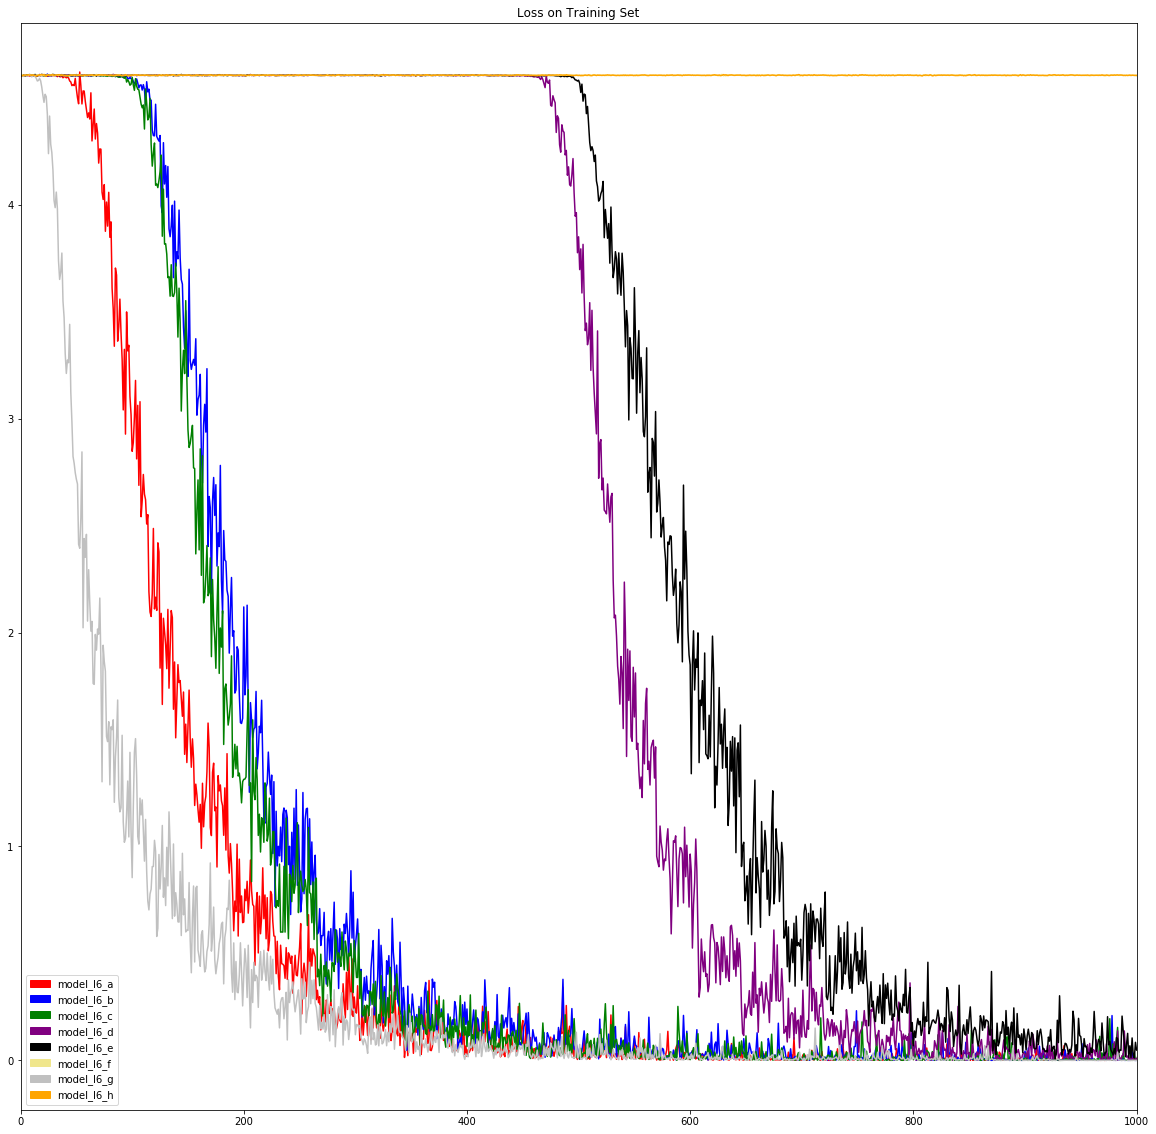

In [45]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
purple_patch = mpatches.Patch(color='purple', label='model_l6_d')
black_patch = mpatches.Patch(color='black', label='model_l6_e')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_f')
silver_patch = mpatches.Patch(color='silver', label='model_l6_g')
orange_patch = mpatches.Patch(color='orange', label='model_l6_h')
# pink_patch = mpatches.Patch(color='pink', label='model_l6_i')


plt.figure(figsize=(20, 20))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch]
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6_a.all_losses, 'red')
plt.plot(model_l6_b.all_losses, 'blue')
plt.plot(model_l6_c.all_losses, 'green')
plt.plot(model_l6_d.all_losses, 'purple')
plt.plot(model_l6_e.all_losses, 'black')
plt.plot(model_l6_f.all_losses, 'khaki')
plt.plot(model_l6_g.all_losses, 'silver')
plt.plot(model_l6_h.all_losses, 'orange')
# plt.plot(model_l6_i.all_losses, 'pink')

plt.xlim(0,1000)
plt.show()

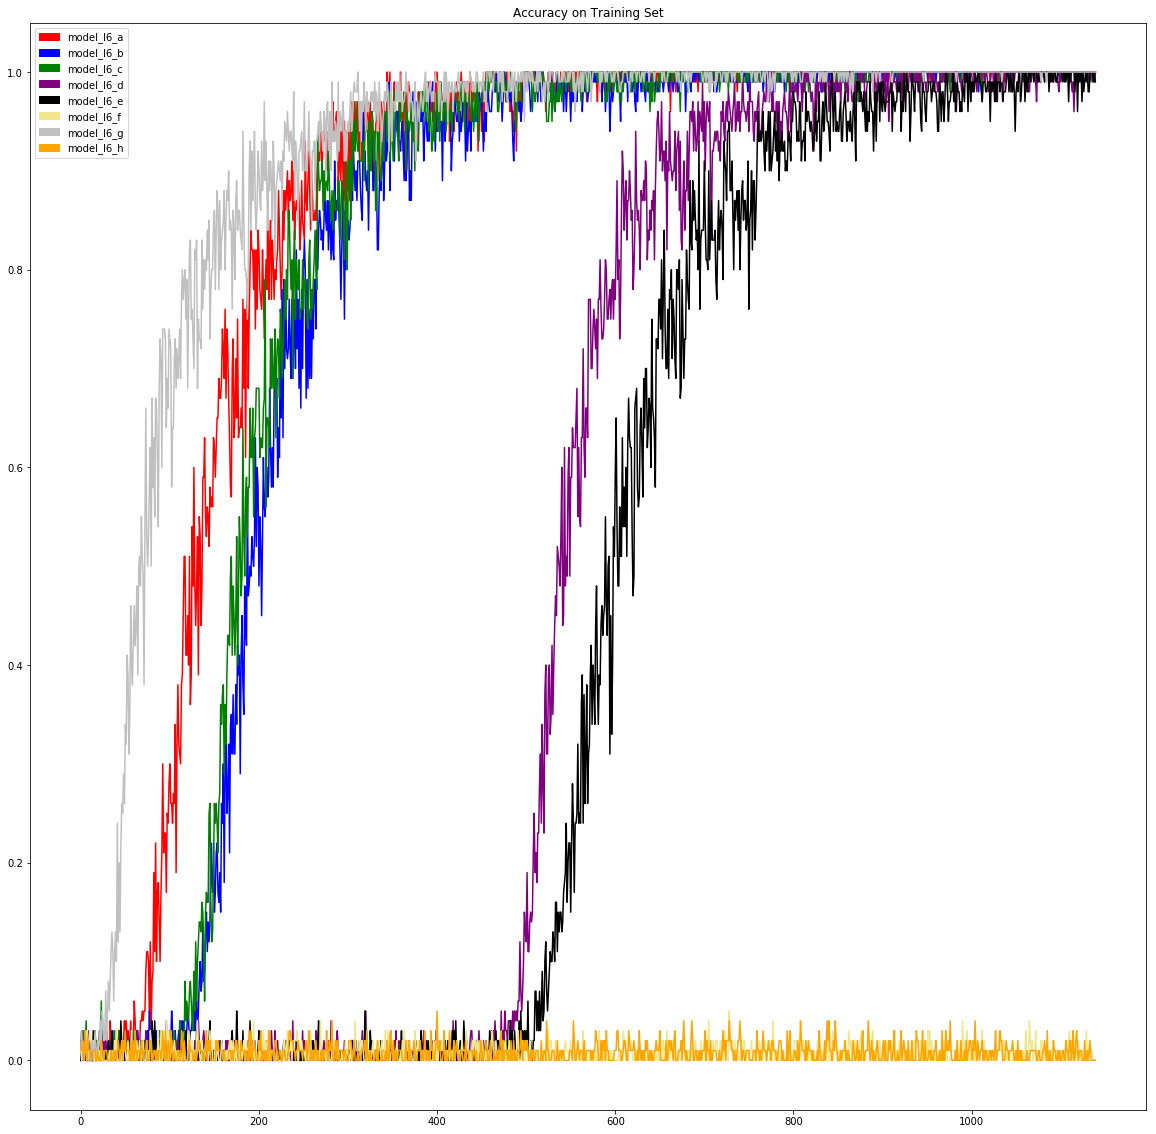

In [51]:
plt.figure(figsize=(20, 20))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch]
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6_a.train_accuracy, 'red')
plt.plot(model_l6_b.train_accuracy, 'blue')
plt.plot(model_l6_c.train_accuracy, 'green')
plt.plot(model_l6_d.train_accuracy, 'purple')
plt.plot(model_l6_e.train_accuracy, 'black')
plt.plot(model_l6_f.train_accuracy, 'khaki')
plt.plot(model_l6_g.train_accuracy, 'silver')
plt.plot(model_l6_h.train_accuracy, 'orange')
# plt.plot(model_l6_i.train_accuracy, 'pink')
# plt.xlim(0,1000)
plt.show()

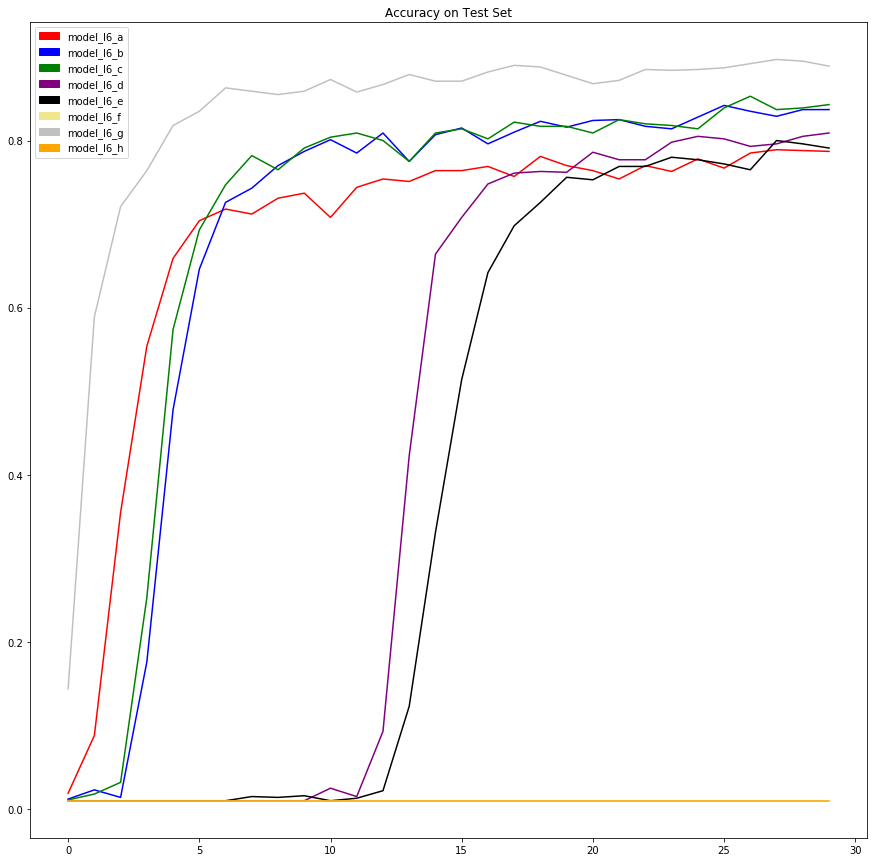

In [52]:
plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch]
           , loc = 'upper left')
plt.title('Accuracy on Test Set')
plt.plot(model_l6_a.test_accuracy, 'red')
plt.plot(model_l6_b.test_accuracy, 'blue')
plt.plot(model_l6_c.test_accuracy, 'green')
plt.plot(model_l6_d.test_accuracy, 'purple')
plt.plot(model_l6_e.test_accuracy, 'black')
plt.plot(model_l6_f.test_accuracy, 'khaki')
plt.plot(model_l6_g.test_accuracy, 'silver')
plt.plot(model_l6_h.test_accuracy, 'orange')
# plt.plot(model_l6_i.test_accuracy, 'pink')
# plt.xlim(0,30)
plt.show()

In [11]:
start_time = time.time()
train = Training(dataloaders, model_l6_f,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.606460	Accuracy: 0.020
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.602612	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.607655	Accuracy: 0.030
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.600180	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.604694	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.600683	Accuracy: 0.050
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.606054	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.602831	Accuracy: 0.020
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.605934	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.601166	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.598576	Accuracy: 0.020
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.602991	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.593204	Accuracy: 0.020
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.596395	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.974401	Accuracy: 0.720
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.878696	Accuracy: 0.780
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.637438	Accuracy: 0.840
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.835771	Accuracy: 0.730
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.944100	Accuracy: 0.710
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.877201	Accuracy: 0.750
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.978253	Accuracy: 0.760
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.000342	Accuracy: 0.720
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.761401	Accuracy: 0.790
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.751664	Accuracy: 0.800
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.030577	Accuracy: 0.700
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.969305	Accuracy: 0.750
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.007487	Accuracy: 0.730
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.020798	Accuracy: 0.730
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.246134	Accuracy: 0.950
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.399504	Accuracy: 0.900
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.213226	Accuracy: 0.960
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.158567	Accuracy: 0.950
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.206515	Accuracy: 0.930
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.250962	Accuracy: 0.920
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.252078	Accuracy: 0.910
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.123853	Accuracy: 0.980
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.325798	Accuracy: 0.880
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.322849	Accuracy: 0.900
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.578642	Accuracy: 0.860
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.393843	Accuracy: 0.910
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.155580	Accuracy: 0.960
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.192241	Accuracy: 0.950
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.149593	Accuracy: 0.960
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.039652	Accuracy: 0.990
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.109798	Accuracy: 0.960
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.059928	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.043467	Accuracy: 0.980
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.240597	Accuracy: 0.930
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.061411	Accuracy: 0.980
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.049461	Accuracy: 0.980
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.020442	Accuracy: 0.990
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.099761	Accuracy: 0.960
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.101189	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.148761	Accuracy: 0.950
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.094404	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.169311	Accuracy: 0.930
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.037927	Accuracy: 0.990
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.041669	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.027365	Accuracy: 0.990
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.025145	Accuracy: 0.990
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.100999	Accuracy: 0.970
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.046324	Accuracy: 0.990
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.049063	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.055628	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.041540	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.013909	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.071882	Accuracy: 0.990
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.034963	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.038000	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.035687	Accuracy: 0.990
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.016562	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.026315	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.021354	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.022619	Accuracy: 0.990
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.008360	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.014752	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.028749	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.024115	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.007543	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.033588	Accuracy: 0.990
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.003568	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.003178	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.010102	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.016028	Accuracy: 0.990
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.001224	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.000655	Accuracy: 1.000
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.000174	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.000502	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.000133	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.000362	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.001552	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.000645	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.001295	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.002262	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.021868	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.001969	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.007626	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.027973	Accuracy: 0.990
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.000656	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.002455	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.011386	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.018354	Accuracy: 0.990
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.059758	Accuracy: 0.990
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.003119	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.005661	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.004931	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.010200	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.003563	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.000153	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.001932	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.012210	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.002683	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.000081	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.000084	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000174	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000168	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.000093	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.000206	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000233	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.000092	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000257	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000086	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000151	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.002394	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000050	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000079	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000142	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000150	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000107	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000110	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000085	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.022639	Accuracy: 0.990
Train 

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_h,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_i,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_i_p,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_f')
orange_patch = mpatches.Patch(color='orange', label='model_l6_h')
pink_patch = mpatches.Patch(color='pink', label='model_l6_i')
black_patch = mpatches.Patch(color='black', label='model_l6_i_p')

plt.figure(figsize=(20, 20))
plt.legend(handles=[khaki_patch,orange_patch,pink_patch,black_patch]
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6_f.all_losses, 'khaki')
plt.plot(model_l6_h.all_losses, 'orange')
plt.plot(model_l6_i.all_losses, 'pink')
plt.plot(model_l6_i_p.all_losses, 'black')
# plt.xlim(0,1000)
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
plt.legend(handles=[khaki_patch,orange_patch,pink_patch,black_patch]
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6_f.train_accuracy, 'khaki')
plt.plot(model_l6_h.train_accuracy, 'orange')
plt.plot(model_l6_i.train_accuracy, 'pink')
plt.plot(model_l6_i_p.train_accuracy, 'black')
# plt.xlim(0,1000)
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
plt.legend(handles=[khaki_patch,orange_patch,pink_patch,black_patch]
           , loc = 'upper left')
plt.title('Accuracy on Test Set')
plt.plot(model_l6_f.test_accuracy, 'khaki')
plt.plot(model_l6_h.test_accuracy, 'orange')
plt.plot(model_l6_i.test_accuracy, 'pink')
plt.plot(model_l6_i_p.test_accuracy, 'black')
# plt.xlim(0,1000)
plt.show()